In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# Load the CSV files into pandas DataFrames
ada_df = pd.read_csv("ada_Prompt.csv")
curie_df = pd.read_csv("curie_Prompt.csv")
davinci_df = pd.read_csv("davinci_Prompt.csv")
turbo_df = pd.read_csv("turbo_Prompt.csv")

# Add a 'Model' column to identify the source of the data
ada_df['Model'] = 'ada'
curie_df['Model'] = 'curie'
davinci_df['Model'] = 'davinci'
turbo_df['Model'] = 'turbo'

# Rename the 'Mean F1 Score', 'Mean Rouge1', etc. columns for consistency
ada_df = ada_df.rename(columns={"Generated_Texts": "Generated_Texts",
                                "F1_Score": "F1_Score",
                                "Rouge1": "Rouge1",
                                "Rouge2": "Rouge2",
                                "RougeL": "RougeL",
                                "Length": "Length",
                                "Vec2": "Vec2"})

curie_df = curie_df.rename(columns={"Generated_Texts": "Generated_Texts",
                                "F1_Score": "F1_Score",
                                "Rouge1": "Rouge1",
                                "Rouge2": "Rouge2",
                                "RougeL": "RougeL",
                                "Length": "Length",
                                "Vec2": "Vec2"})

davinci_df = davinci_df.rename(columns={"Generated_Texts": "Generated_Texts",
                                "F1_Score": "F1_Score",
                                "Rouge1": "Rouge1",
                                "Rouge2": "Rouge2",
                                "RougeL": "RougeL",
                                "Length": "Length",
                                "Vec2": "Vec2"})

turbo_df = turbo_df.rename(columns={"Generated_Texts": "Generated_Texts",
                                "F1_Score": "F1_Score",
                                "Rouge1": "Rouge1",
                                "Rouge2": "Rouge2",
                                "RougeL": "RougeL",
                                "Length": "Length",
                                "Vec2": "Vec2"})

# Combine the DataFrames
combined_df = pd.concat([ada_df, curie_df, davinci_df, turbo_df], ignore_index=True)

# Reorder columns for the desired format
column_order = ['Name', 'Model','Generated_Texts', 'F1_Score', 'Rouge1', 'Rouge2', 'RougeL', 'Length', 'Vec2', 'Bleu']
combined_df = combined_df[column_order]

# Create a new DataFrame with alternating rows of models for each author
alternating_rows = pd.DataFrame()
for name in combined_df['Name'].unique():
    author_data = combined_df[combined_df['Name'] == name]
    for model in author_data['Model'].unique():
        model_data = author_data[author_data['Model'] == model]
        alternating_rows = pd.concat([alternating_rows, model_data], ignore_index=True)

# Save the combined DataFrame to a new CSV file
alternating_rows.to_csv("combined_Prompt.csv", index=False)


In [1]:
import pandas as pd

data = pd.read_csv('combined_Prompt.csv')

df = pd.DataFrame(data)

# Group the DataFrame by 'Model' and each text column, and calculate the mean length for each group
mean_length1 = df.groupby(['Model', 'Generated_Texts'])['Bleu'].mean().reset_index()
mean_length2 = df.groupby(['Generated_Texts', 'Model'])['Bleu'].mean().reset_index()

mean_length1.to_csv('bleu1_results.csv', index=False)
mean_length2.to_csv('bleu2_results.csv', index=False)

# Print the result
print(mean_length1)
print(mean_length2)


      Model Generated_Texts      Bleu
0       ada           Text1  0.055245
1       ada           Text2  0.097530
2       ada           Text3  0.064305
3     curie           Text1  0.245725
4     curie           Text2  0.180280
5     curie           Text3  0.161260
6   davinci           Text1  0.100365
7   davinci           Text2  0.078390
8   davinci           Text3  0.313870
9     turbo           Text1  0.363670
10    turbo           Text2  0.364425
11    turbo           Text3  0.334400
   Generated_Texts    Model      Bleu
0            Text1      ada  0.055245
1            Text1    curie  0.245725
2            Text1  davinci  0.100365
3            Text1    turbo  0.363670
4            Text2      ada  0.097530
5            Text2    curie  0.180280
6            Text2  davinci  0.078390
7            Text2    turbo  0.364425
8            Text3      ada  0.064305
9            Text3    curie  0.161260
10           Text3  davinci  0.313870
11           Text3    turbo  0.334400


In [7]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('combined_Prompt.csv')

# Create a DataFrame
df = pd.DataFrame(data)

# Group the DataFrame by 'Generated_Texts' and 'Model'
grouped = df.groupby(['Generated_Texts', 'Model'])

# Calculate the mean for each metric within each group
mean_metrics = grouped[['Bleu', 'F1_Score', 'RougeL', 'Length', 'Vec2']].mean().reset_index()

# Save the results to a single CSV file with columns for each metric
mean_metrics.to_csv('mean_metrics_results.csv', index=False)

# Print the result
print(mean_metrics)


   Generated_Texts    Model      Bleu  F1_Score    RougeL  Length      Vec2
0            Text1      ada  0.055245  0.125840  0.234083  266.10  0.617607
1            Text1    curie  0.245725  0.336623  0.540969  361.20  0.712726
2            Text1  davinci  0.100365  0.224434  0.412403  165.80  0.609718
3            Text1    turbo  0.363670  0.457362  0.576534  353.80  0.926377
4            Text2      ada  0.097530  0.170375  0.314806  249.60  0.590239
5            Text2    curie  0.180280  0.278180  0.367745  280.80  0.686136
6            Text2  davinci  0.078390  0.206396  0.231324  169.30  0.585558
7            Text2    turbo  0.364425  0.473563  0.591379  335.90  0.913766
8            Text3      ada  0.064305  0.142477  0.254326  163.70  0.579320
9            Text3    curie  0.161260  0.230357  0.440889  269.65  0.696387
10           Text3  davinci  0.313870  0.416352  0.381838  314.65  0.885464
11           Text3    turbo  0.334400  0.427954  0.546116  361.40  0.929833


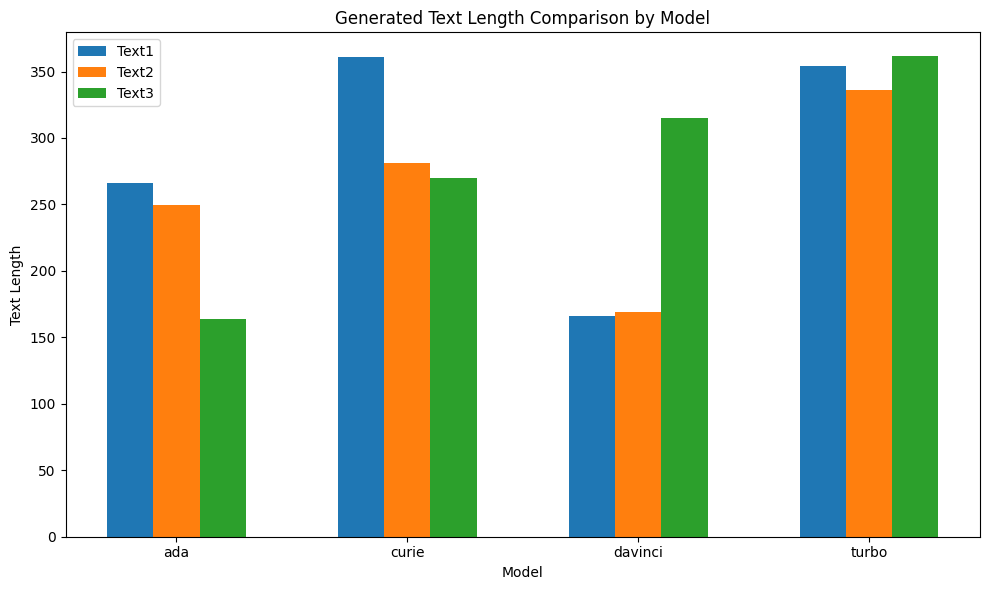

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Model': ['ada', 'curie', 'davinci', 'turbo'],
    'Text1': [266.10, 361.20, 165.80, 353.80],
    'Text2': [249.60, 280.80, 169.30, 335.90],
    'Text3': [163.70, 269.65, 314.65, 361.40]
}


df = pd.DataFrame(data)

# Set figure size
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.2

# Position of bars on x-axis
index = range(len(df['Model']))

# Create bars
plt.bar(index, df['Text1'], bar_width, label='Text1')
plt.bar([i + bar_width for i in index], df['Text2'], bar_width, label='Text2')
plt.bar([i + 2 * bar_width for i in index], df['Text3'], bar_width, label='Text3')

# X-axis labels
plt.xlabel('Model')
plt.ylabel('Text Length')

# Title and legend
plt.title('Generated Text Length Comparison by Model')
plt.xticks([i + bar_width for i in index], df['Model'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


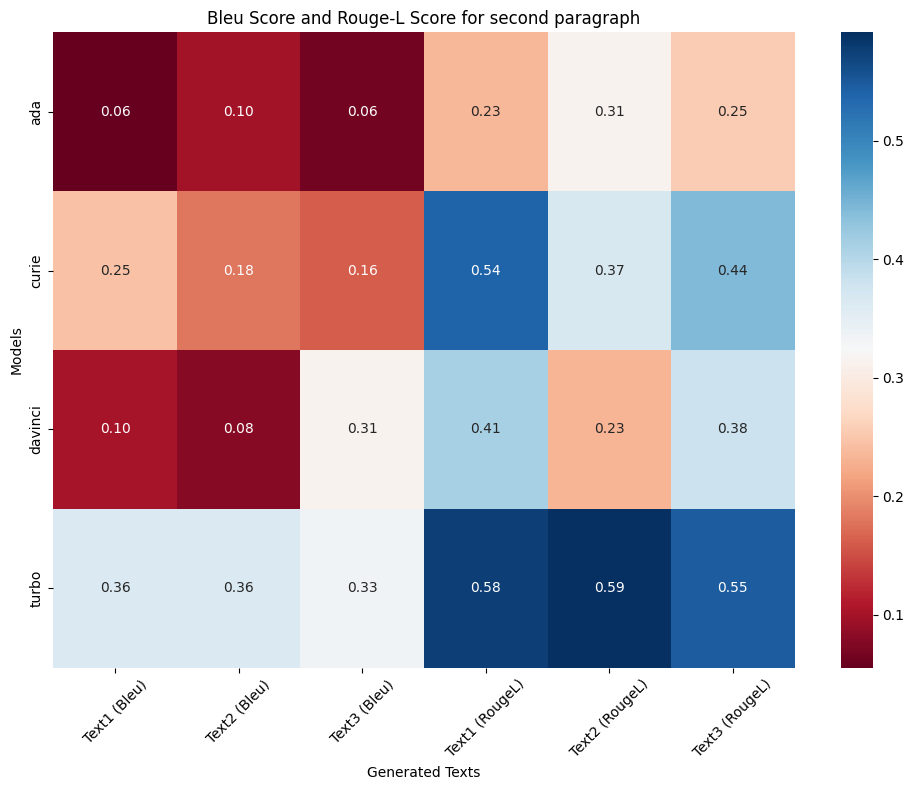

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data
data = pd.read_csv('mean.csv')

# Pivot the data for the heatmap
heatmap_data = data.pivot(index='Model', columns='Generated_Texts', values=['Bleu', 'RougeL'])

# Set up the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_data, cmap='RdBu', annot=True, fmt='.2f', yticklabels=heatmap_data.index)

# Modify x-axis labels to include both column names and values
xticklabels = [f'{col[1]} ({col[0]})' for col in heatmap_data.columns]
ax.set_xticklabels(xticklabels, rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel('Generated Texts')  # Updated x-axis label
plt.ylabel('Models')
plt.title('Bleu Score and Rouge-L Score for second paragraph')
plt.tight_layout()

# Show the plot
plt.show()


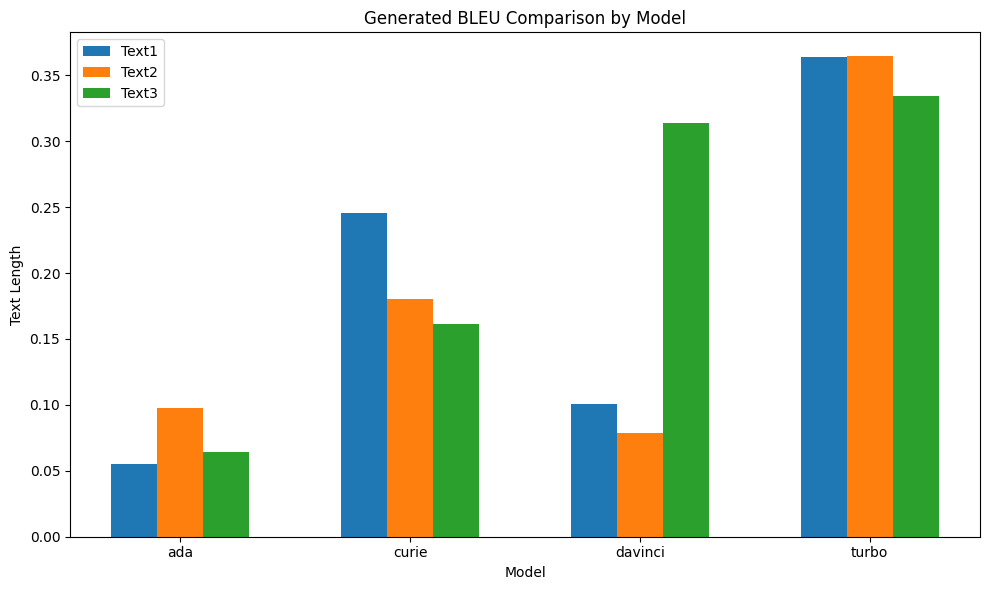

In [6]:
#1-	Comparison of Prompts by Model and Text Length Metric

import matplotlib.pyplot as plt
import pandas as pd

# Data
data = pd.read_csv('p2_bleu.csv')

df = pd.DataFrame(data)

# Set figure size
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.2

# Position of bars on x-axis
index = range(len(df['Model']))

# Create bars
plt.bar(index, df['Text1'], bar_width, label='Text1')
plt.bar([i + bar_width for i in index], df['Text2'], bar_width, label='Text2')
plt.bar([i + 2 * bar_width for i in index], df['Text3'], bar_width, label='Text3')

# X-axis labels
plt.xlabel('Model')
plt.ylabel('Text Length')

# Title and legend
plt.title('Generated BLEU Comparison by Model')
plt.xticks([i + bar_width for i in index], df['Model'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
